In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [55]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [36]:
iris = load_iris()
X = iris.data
y = iris.target

In [37]:
df = pd.DataFrame(data=X, columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
df["Species"] = y

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [40]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [41]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming X_train_scaled and y_train are defined
k_values = np.arange(1, 21)
mean_accuracy = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    mean_accuracy.append(scores.mean())


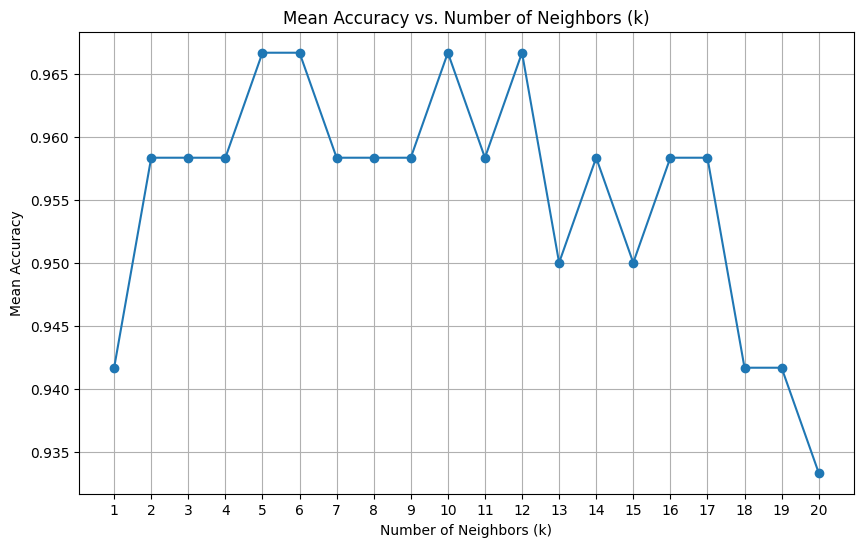

In [44]:
# Plot mean accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracy, marker='o', linestyle='-')
plt.title('Mean Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [11]:
# Choose the best k value
best_k = k_values[np.argmax(mean_accuracy)]
print("Best k value:", best_k)

Best k value: 5


In [45]:
# Train the model with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [46]:
y_score = best_knn.predict_proba(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

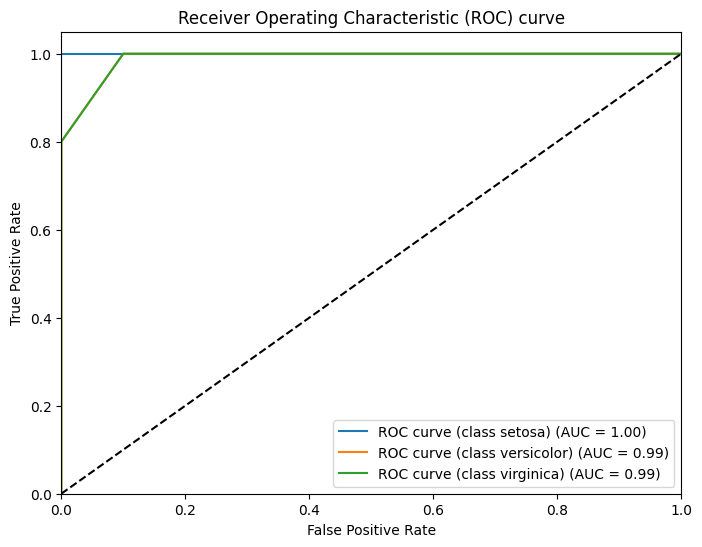

In [52]:
# Plot ROC curves and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {iris.target_names[i]}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


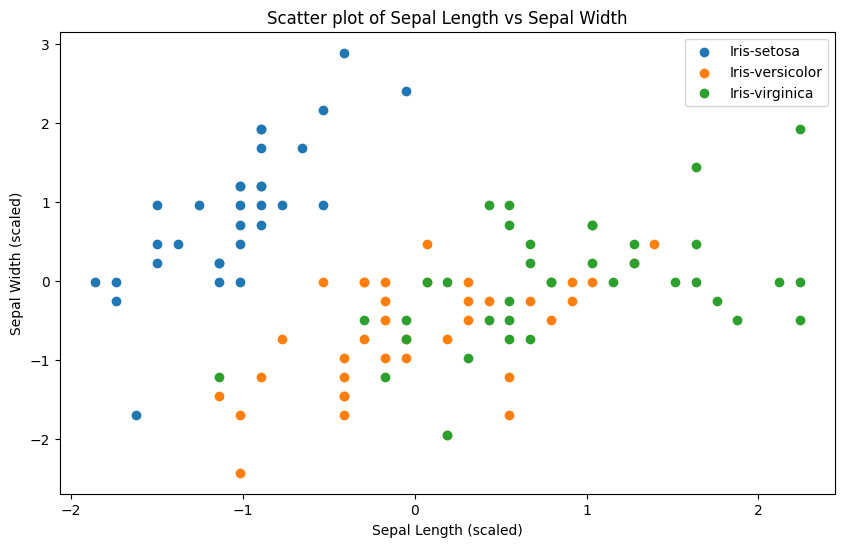

Optimal k value: 3


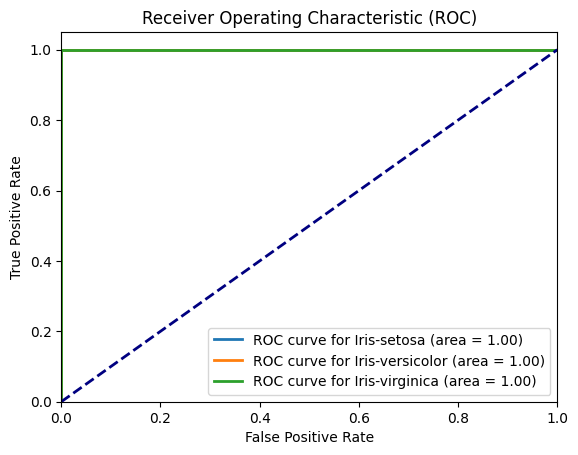

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


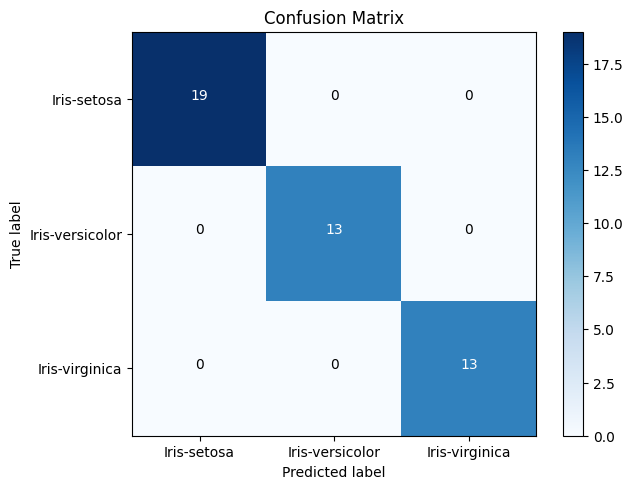

In [57]:
# Preprocessing the Dataset
X = df.drop(['Id', 'Species'], axis=1)  # Assuming 'Id' and 'Species' columns are present
y = df['Species']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the data using specific graphs
plt.figure(figsize=(10, 6))
for species in df['Species'].unique():
    plt.scatter(X_train_scaled[y_train == species, 0], X_train_scaled[y_train == species, 1], label=species)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.legend()
plt.show()

# Hyperparameter Tuning - Find k value
k_values = list(range(1, 21))
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]
print("Optimal k value:", optimal_k)

# AUC and ROC curve
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class (class 1)
y_prob = knn.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(df['Species'].unique())):
    fpr[i], tpr[i], _ = roc_curve((y_test == df['Species'].unique()[i]).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(len(df['Species'].unique())):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for {} (area = {:0.2f})'.format(df['Species'].unique()[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
y_pred = knn.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(df['Species'].unique()))
plt.xticks(tick_marks,df['Species'].unique())
plt.yticks(tick_marks, df['Species'].unique())

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
